<center>
<h1> MV LAB ASSIGNMENT 3 </h1>

Anirudh T, 21BAI1163
</center>

<center>

[LINK TO GITHUB REPOSITORY](https://github.com/OneTrueAnirudh/MV-LAB-3) 

</center>

importing libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

loading a video

In [2]:
vid = r"C:\Trial\MV\images\21bai1163_vid_sample.mp4"
vid = cv2.VideoCapture(vid)
if not vid.isOpened():
    print("couldn't open video")
else:
    print("opened video")

opened video


extracting frames

In [3]:
frames = []
fc = 0
while True:
    ret, f = vid.read()
    if not ret:
        break
    frames.append(f)
    fc+=1
vid.release()
print(f"no. of frames extracted: {fc}")

no. of frames extracted: 287


performing spatio-temporal segmentation (1st 10 frames)

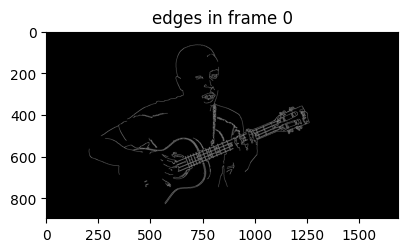

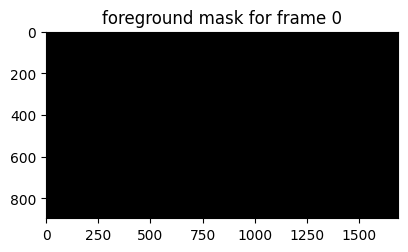

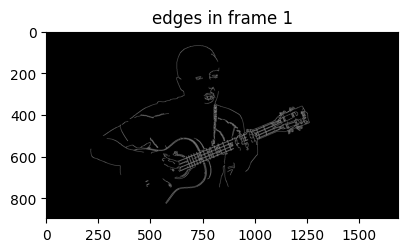

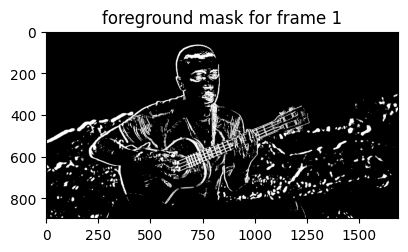

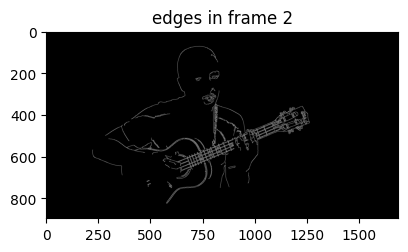

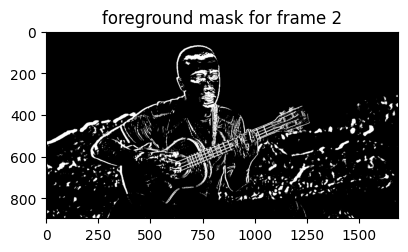

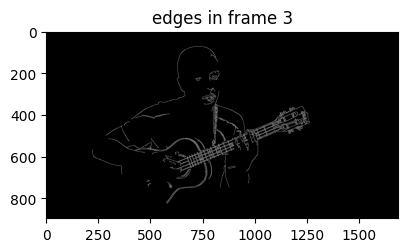

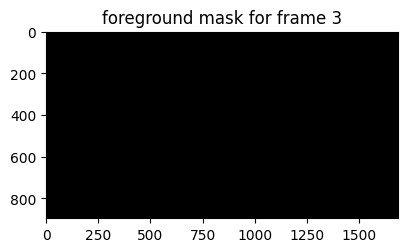

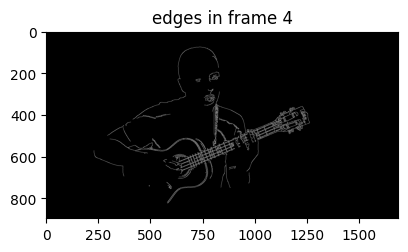

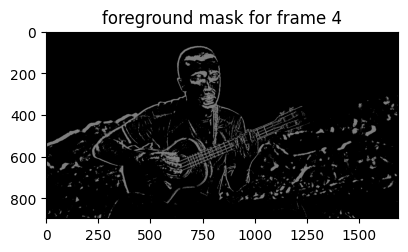

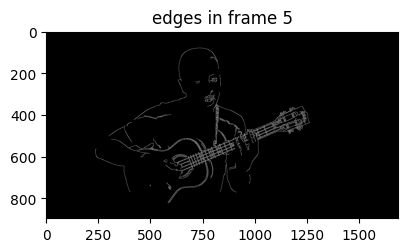

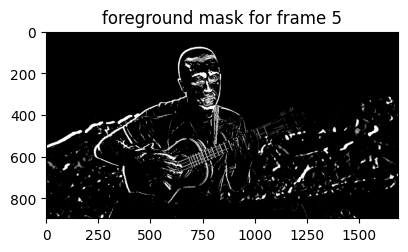

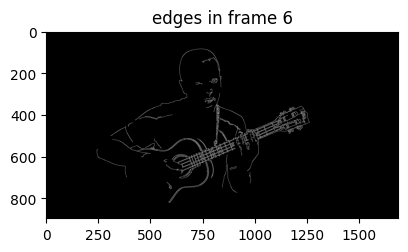

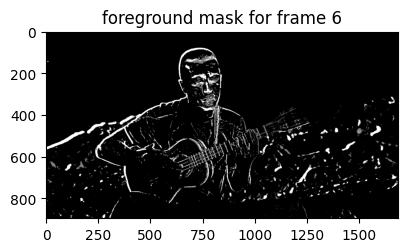

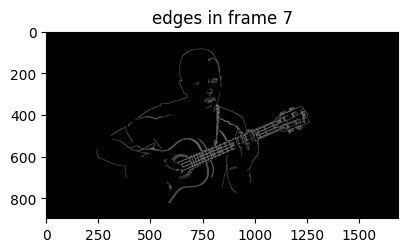

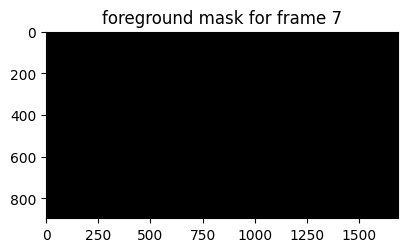

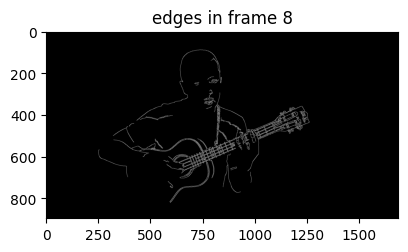

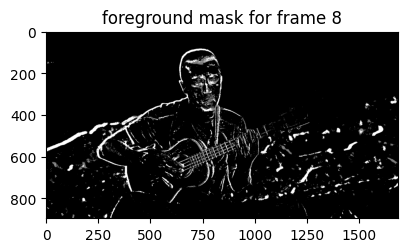

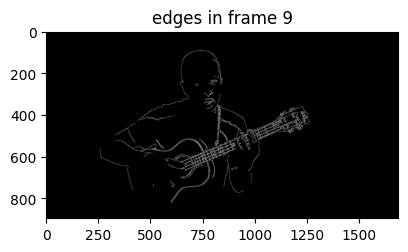

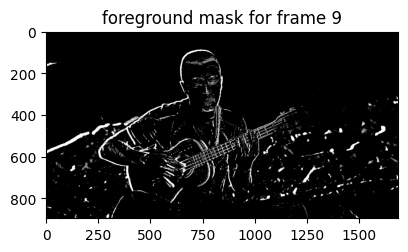

In [4]:
seg = []
bg = cv2.createBackgroundSubtractorMOG2()
for i, f in enumerate(frames):
    gray_frame = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    edge = cv2.Canny(gray_frame, 50, 150)
    fg = bg.apply(f)
    seg.append((edge, fg))
for i in range(0,10):
    e, fm = seg[i]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'edges in frame {i}')
    plt.imshow(e, cmap='gray')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    plt.title(f'foreground mask for frame {i}')
    plt.imshow(fm, cmap='gray')

detecting scene cuts

In [5]:
std_cutoff = []
prev = None
win = 10
diffs = []
for i, f in enumerate(frames):
    hist = cv2.calcHist([f],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    if prev is not None:
        d = cv2.compareHist(prev, hist, cv2.HISTCMP_BHATTACHARYYA)
        diffs.append(d)
        if d>0.1:
            std_cutoff.append(('hard cut',i))
        if len(diffs)>=win:
            avg = np.mean(diffs[-win])
            if 0.3<avg<=0.5:
                std_cutoff.append(('soft cut', i-win // 2))
    else:
        diffs.append(0)
    prev = hist
print("scene cuts:")
for ct, fn in std_cutoff:
    print(f"found {ct} at frame {fn}")


scene cuts:
found hard cut at frame 141
found soft cut at frame 145


opened video


Text(0.5, 1.0, 'Difference between consecutive frames')

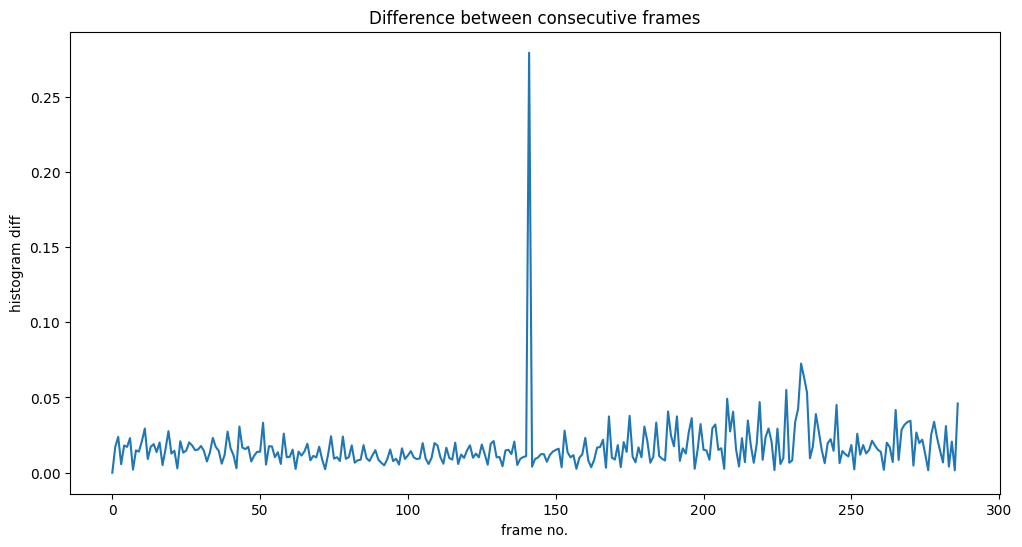

In [7]:

vid = r"C:\Trial\MV\images\21bai1163_vid_sample.mp4"
vid = cv2.VideoCapture(vid)
if not vid.isOpened():
    print("couldn't open video")
else:
    print("opened video")

fc = 0
prev = None
diffs = []
while True:
    ret, f = vid.read()
    if not ret:
        break
    fc+=1
    gr = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gr],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    if prev is not None:
        d = cv2.compareHist(prev, hist, cv2.HISTCMP_BHATTACHARYYA)
        diffs.append(d)
    else:
        diffs.append(0)
    prev = hist
vid.release()
plt.figure(figsize=(12,6))
plt.plot(diffs, label="hist diff")
plt.xlabel("frame no.")
plt.ylabel("histogram diff")
plt.title("Difference between consecutive frames")

In [13]:
mean_diff = np.mean(diffs)
std_dev = np.std(diffs)
hi_cutoff = mean_diff + 2*std_dev
std_cutoff = mean_diff + std_dev
print(f"high cutoff: {hi_cutoff:.3f}")
print(f"std cutoff: {std_cutoff:.3f}")

high cutoff: 0.055
std cutoff: 0.036


In [9]:
st = []
for i, d in enumerate(diffs):
    if d>hi_cutoff:
        st.append(('Hard Cut', i))
    elif std_cutoff < d < hi_cutoff:
        st.append(('Soft Cut', i))
print("Scene cuts:")
for ct, fn in st:
    print(f"{ct} at frame {fn}")

Scene cuts:
Hard Cut at frame 141
Soft Cut at frame 168
Soft Cut at frame 175
Soft Cut at frame 188
Soft Cut at frame 191
Soft Cut at frame 196
Soft Cut at frame 208
Soft Cut at frame 210
Soft Cut at frame 219
Hard Cut at frame 228
Soft Cut at frame 232
Hard Cut at frame 233
Hard Cut at frame 234
Soft Cut at frame 235
Soft Cut at frame 238
Soft Cut at frame 245
Soft Cut at frame 265
Soft Cut at frame 286


marking scene cuts on the video

opened video


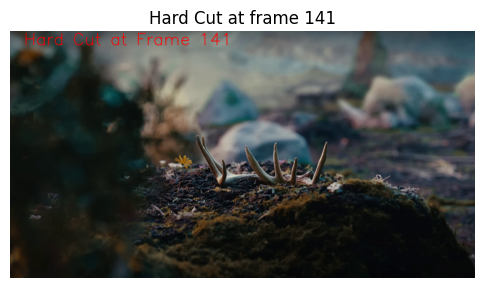

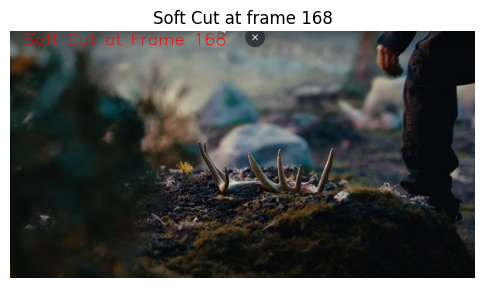

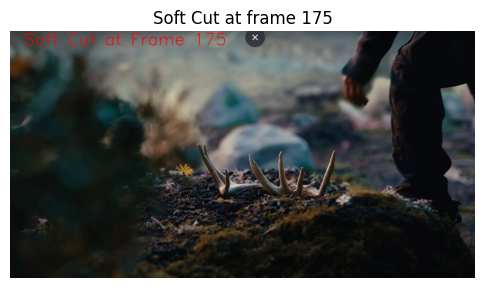

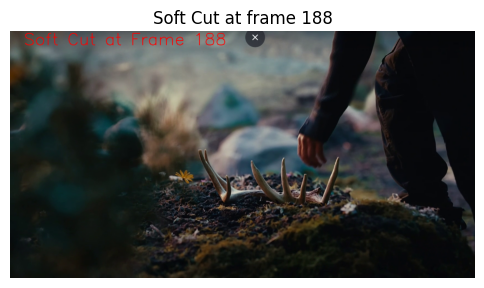

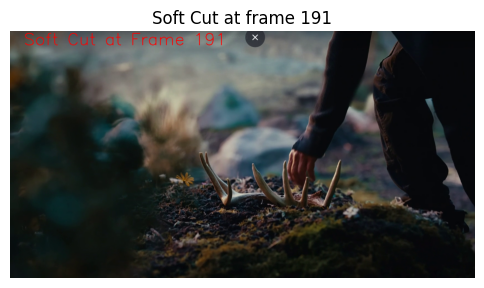

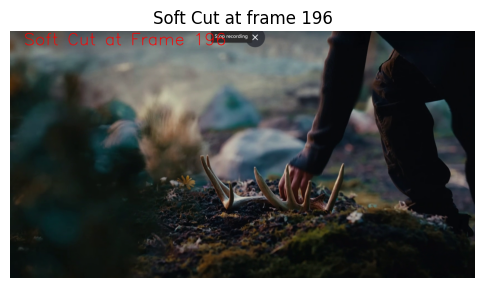

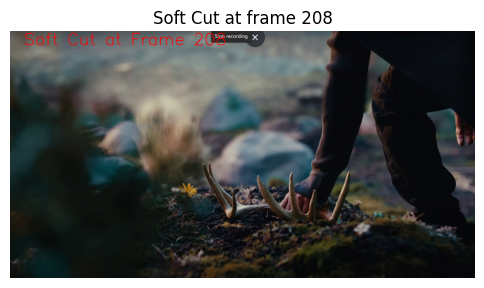

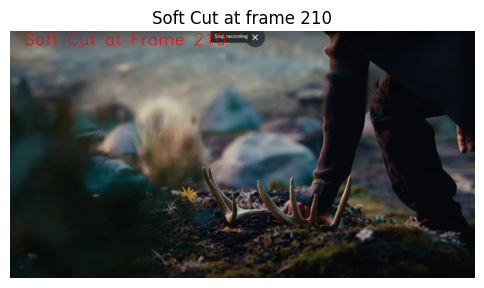

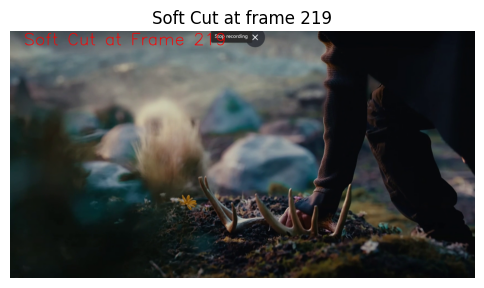

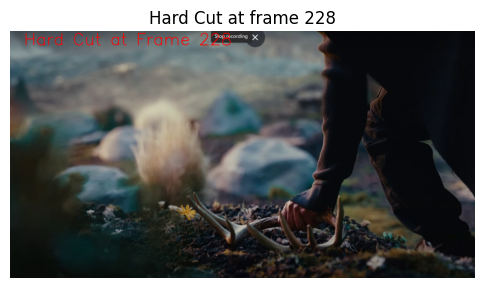

In [11]:
vid = r"C:\Trial\MV\images\21bai1163_vid_sample.mp4"
vid = cv2.VideoCapture(vid)
if not vid.isOpened():
    print("couldn't open video")
else:
    print("opened video")

fwc = []
fi = 0
while True:
    ret, f = vid.read()
    if not ret:
        break
    for ct, cf in st:
        if fi==cf:
            af = f.copy()
            cv2.putText(af, f"{ct} at Frame {fi}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255),2)
            fwc.append((af, ct, fi))
            break
    fi+=1
vid.release()

for af, ct, fi in fwc[0:10]:
    plt.figure(figsize=(6,4))
    plt.title(f"{ct} at frame {fi}")
    plt.imshow(cv2.cvtColor(af, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

results of cut detection and segmentation

Hard Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Hard Cut


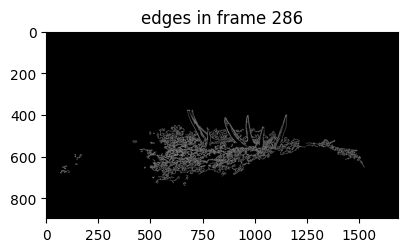

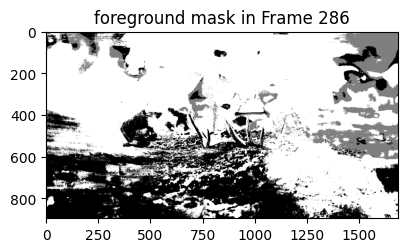

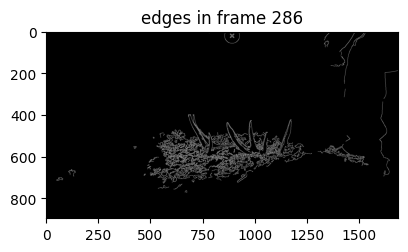

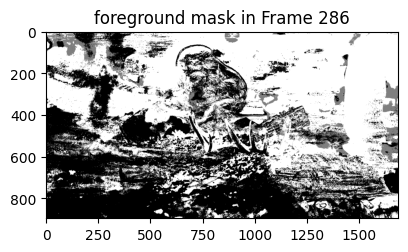

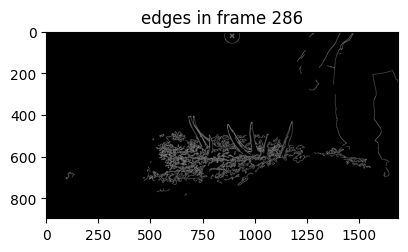

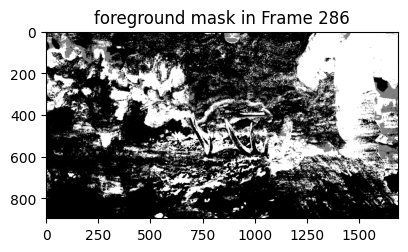

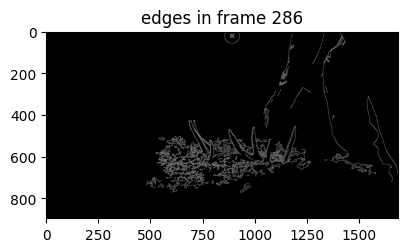

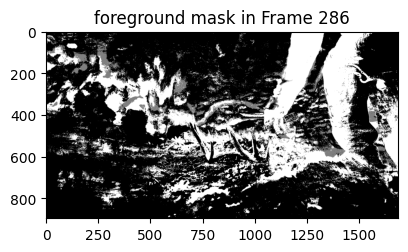

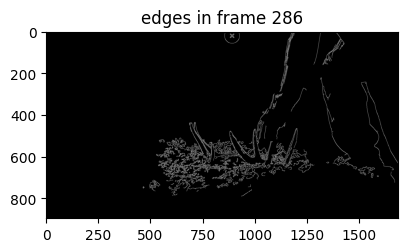

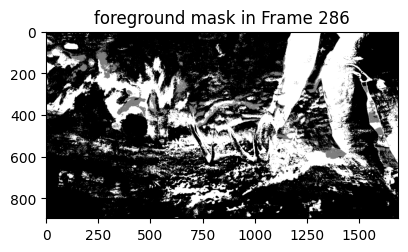

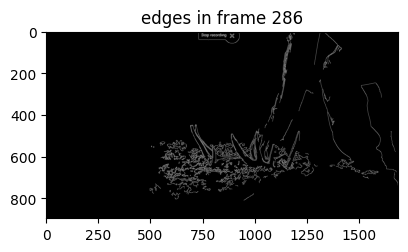

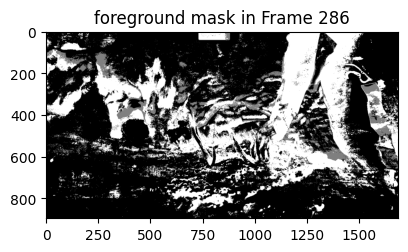

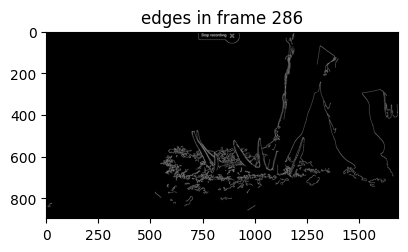

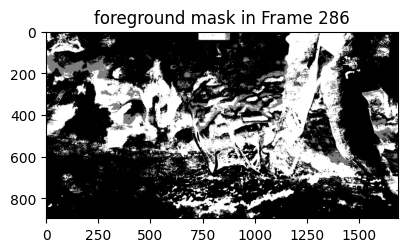

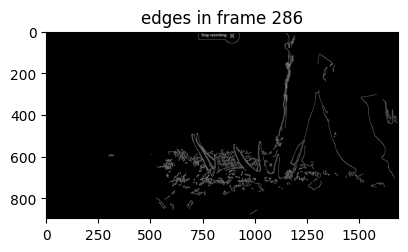

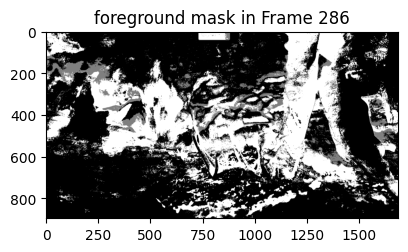

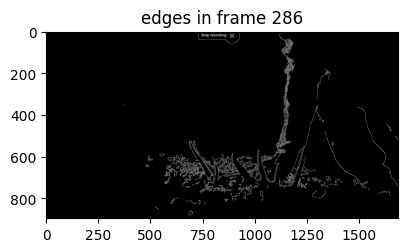

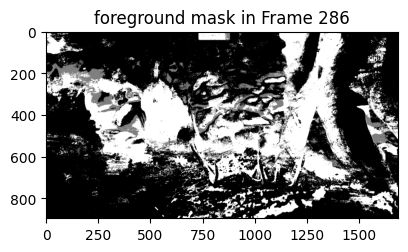

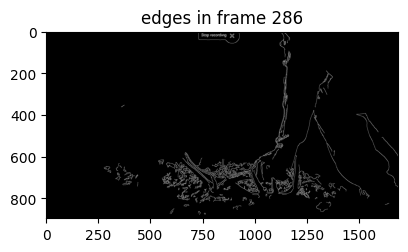

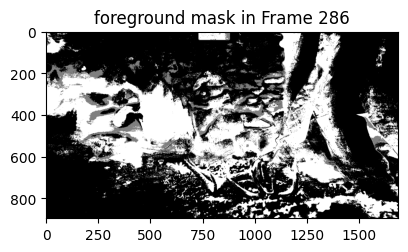

In [12]:
for af, ct, fi in fwc[:10]:
    edge, fm = seg[fi]
    print(f"{ct}")
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'edges in frame {i}')
    plt.imshow(edge, cmap='gray')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    plt.title(f'foreground mask in Frame {i}')
    plt.imshow(fm, cmap='gray')